In [ ]:
# Torch - Torchvision - IceVision - IceData - MMDetection - YOLOv5 - EfficientDet Installation
!wget https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh

# Choose your installation target: cuda11 or cuda10 or cpu
!bash icevision_install.sh cuda11

In [ ]:
# !pip install pillow==8.2.0

In [1]:
from icevision.all import *
from pathlib import Path
import os 

/opt/conda/envs/dstoolkit/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31
1837152B [00:02, 814017.55B/s] 


In [3]:
cwd = os.getcwd()
coco_dir = Path(cwd+'/SRC/')
# Create the parser
trainParser = parsers.COCOBBoxParser(coco_dir / "Annotations/train.json", coco_dir / "Immagini_train")
# Parse annotations to create records
train_records, valid_records = trainParser.parse()
trainParser.class_map

100%|██████████| 702/702 [00:00<00:00, 5290.47it/s]
INFO     - Autofixing records | icevision.parsers.parser:parse:122
100%|██████████| 389/389 [00:00<00:00, 20711.43it/s]


<ClassMap: {'background': 0, 'Wake': 1}>

In [8]:
train_records.get_by_record_id(
record_id=9
)

BaseRecord

common: 
	- Image size ImgSize(width=1121, height=732)
	- Filepath: /home/jovyan/work/SRC/Immagini_train/9.png
	- Img: None
	- Record ID: 9
detection: 
	- Is Crowds: [0, 0, 0, 0, 0]
	- Areas: [25392, 18135, 5166, 12540, 53010]
	- BBoxes: [<BBox (xmin:736, ymin:3, xmax:920, ymax:141)>, <BBox (xmin:607, ymin:106, xmax:802, ymax:199)>, <BBox (xmin:557, ymin:295, xmax:639, ymax:358)>, <BBox (xmin:601, ymin:327, xmax:733, ymax:422)>, <BBox (xmin:261, ymin:382, xmax:447, ymax:667)>]
	- Class Map: <ClassMap: {'background': 0, 'Wake': 1}>
	- Labels: [1, 1, 1, 1, 1]

In [25]:
# Transforms: DATA AUGMENTATION.
# size is set to 384 because EfficientDet requires its inputs to be divisible by 128
image_size = 768

# train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize=1024), tfms.A.Normalize()])
# valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])

train_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size),  tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size),  tfms.A.Normalize()])

# train_tfms = tfms.A.Adapter([   tfms.A.Normalize()])
# valid_tfms = tfms.A.Adapter([   tfms.A.Normalize()])

In [26]:
# Datasets
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

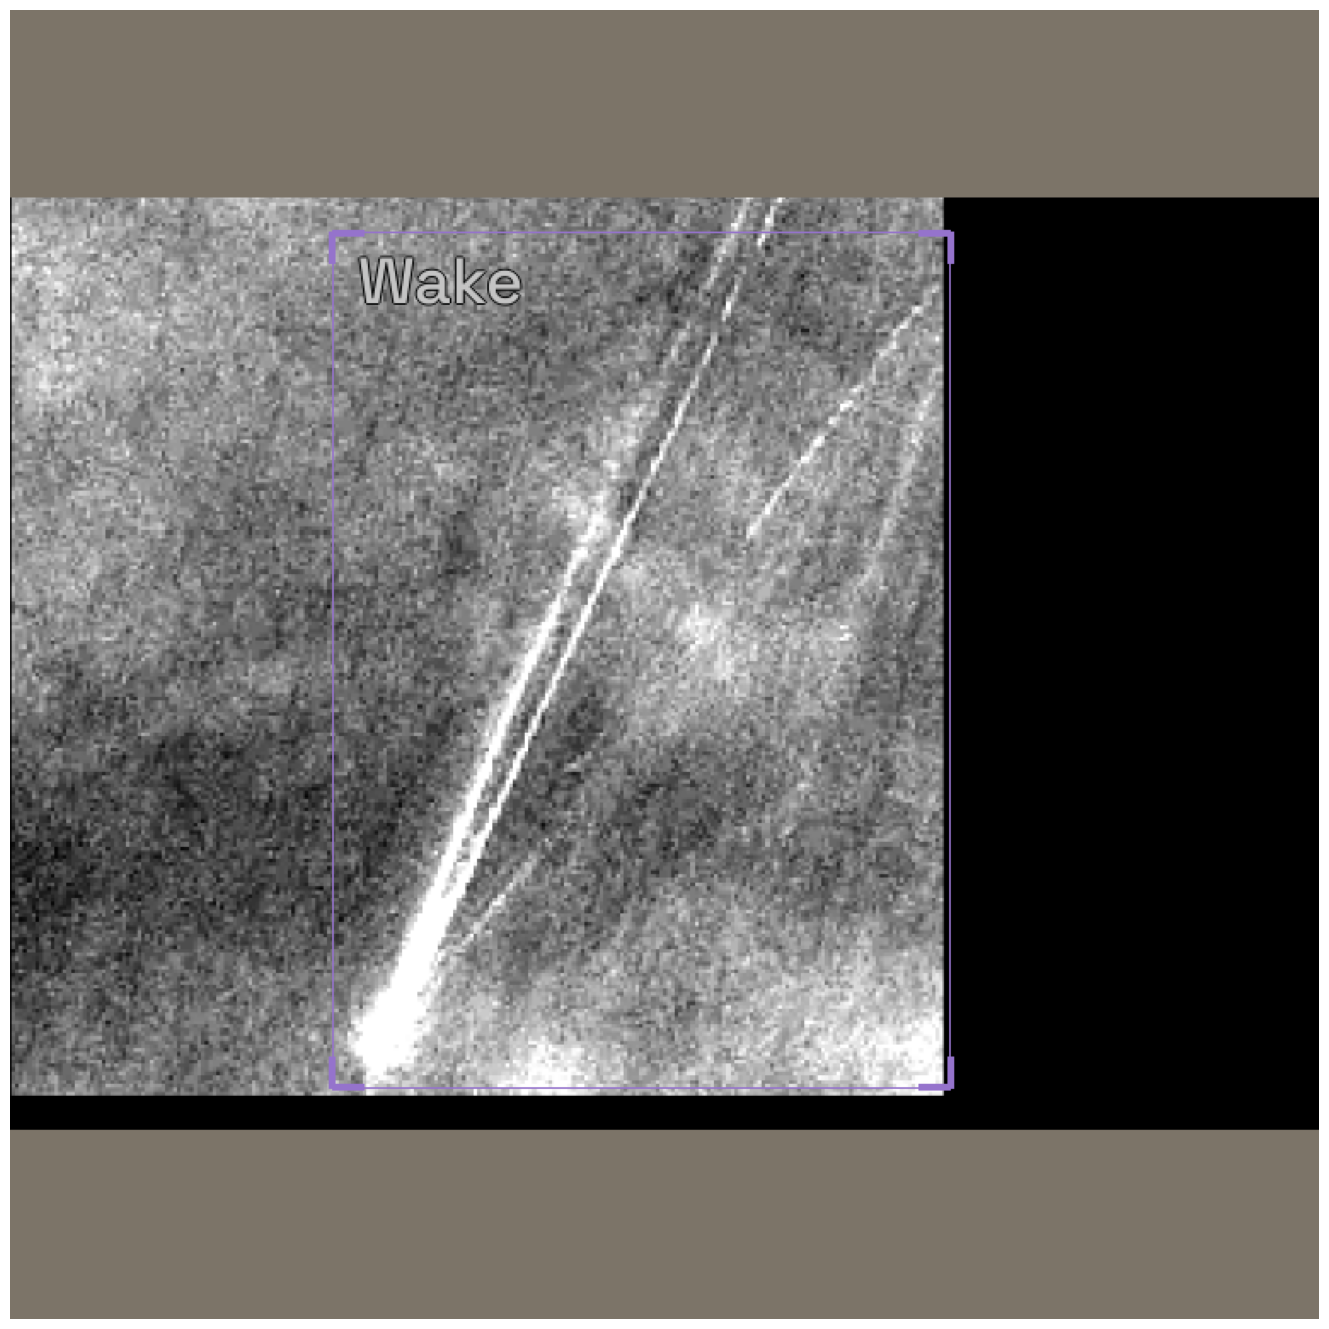

In [27]:
show_sample(train_ds[9], figsize=(17,17))

In [ ]:
# Show an element of the train_ds with augmentation transformations applied
samples = [train_ds[2] for _ in range(3)]
# show_samples(samples, ncols=1)

In [28]:
model_type = models.mmdet.vfnet
backbone = model_type.backbones.resnet50_fpn_1x(pretrained=True)
extra_args = {}

In [29]:
# Just change the value of selection to try another model

selection = 0

extra_args = {}

if selection == 0:
  model_type = models.mmdet.vfnet
  backbone = model_type.backbones.resnet50_fpn_mstrain_2x

if selection == 1:
  model_type = models.mmdet.retinanet
  backbone = model_type.backbones.resnet50_fpn_1x
  # extra_args['cfg_options'] = { 
  #   'model.bbox_head.loss_bbox.loss_weight': 2,
  #   'model.bbox_head.loss_cls.loss_weight': 0.8,
  #    }

if selection == 2:
  model_type = models.mmdet.faster_rcnn
  backbone = model_type.backbones.resnet101_fpn_2x
  # extra_args['cfg_options'] = { 
  #   'model.roi_head.bbox_head.loss_bbox.loss_weight': 2,
  #   'model.roi_head.bbox_head.loss_cls.loss_weight': 0.8,
  #    }

if selection == 3:
  model_type = models.mmdet.ssd
  backbone = model_type.backbones.ssd300

if selection == 4:
  model_type = models.mmdet.yolox
  backbone = model_type.backbones.yolox_s_8x8

if selection == 5:
  model_type = models.mmdet.yolof
  backbone = model_type.backbones.yolof_r50_c5_8x8_1x_coco

if selection == 6:
  model_type = models.mmdet.detr
  backbone = model_type.backbones.r50_8x2_150e_coco

if selection == 7:
  model_type = models.mmdet.deformable_detr
  backbone = model_type.backbones.twostage_refine_r50_16x2_50e_coco

if selection == 8:
  model_type = models.mmdet.fsaf
  backbone = model_type.backbones.x101_64x4d_fpn_1x_coco

if selection == 9:
  model_type = models.mmdet.sabl
  backbone = model_type.backbones.r101_fpn_gn_2x_ms_640_800_coco

if selection == 10:
  model_type = models.mmdet.centripetalnet
  backbone = model_type.backbones.hourglass104_mstest_16x6_210e_coco

elif selection == 11:
  # The Retinanet model is also implemented in the torchvision library
  model_type = models.torchvision.retinanet
  backbone = model_type.backbones.resnet50_fpn

elif selection == 12:
  model_type = models.ross.efficientdet
  backbone = model_type.backbones.tf_lite0
  # The efficientdet model requires an img_size parameter
  extra_args['img_size'] = image_size

elif selection == 13:
  model_type = models.ultralytics.yolov5
  backbone = model_type.backbones.small
  # The yolov5 model requires an img_size parameter
  extra_args['img_size'] = image_size

model_type, backbone, extra_args

(<module 'icevision.models.mmdet.models.vfnet' from '/opt/conda/envs/dstoolkit/lib/python3.8/site-packages/icevision/models/mmdet/models/vfnet/__init__.py'>,
 {})

In [30]:
backbone.__dict__

{'model_name': 'vfnet',
 'config_path': Path('/home/jovyan/.icevision/mmdetection_configs/mmdetection_configs-2.20.1/configs/vfnet/vfnet_r50_fpn_mstrain_2x_coco.py'),
 'weights_url': 'https://openmmlab.oss-cn-hangzhou.aliyuncs.com/mmdetection/v2.0/vfnet/vfnet_r50_fpn_mstrain_2x_coco/vfnet_r50_fpn_mstrain_2x_coco_20201027-7cc75bd2.pth',
 'pretrained': True}

In [31]:
# Instantiate the model
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(trainParser.class_map), **extra_args) 

2022-03-07 14:59:16,357 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}
2022-03-07 14:59:16,359 - mmcv - INFO - load model from: torchvision://resnet50
2022-03-07 14:59:16,360 - mmcv - INFO - load checkpoint from torchvision path: torchvision://resnet50
2022-03-07 14:59:16,436 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2022-03-07 14:59:16,450 - mmcv - INFO - initialize FPN with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2022-03-07 14:59:16,472 - mmcv - INFO - initialize VFNetHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01, 'override': {'type': 'Normal', 'name': 'vfnet_cls', 'std': 0.01, 'bias_prob': 0.01}}
2022-03-07 14:59:16,501 - mmcv - INFO - 
backbone.conv1.weight - torch.Size([64, 3, 7, 7]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-03-07 14:59:16,502 - mmcv - INFO -

load checkpoint from local path: checkpoints/vfnet/vfnet_r50_fpn_mstrain_2x_coco_20201027-7cc75bd2.pth
The model and loaded state dict do not match exactly

size mismatch for bbox_head.vfnet_cls.weight: copying a param with shape torch.Size([80, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([1, 256, 3, 3]).
size mismatch for bbox_head.vfnet_cls.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([1]).


In [34]:
# Data Loaders
train_dl = model_type.train_dl(train_ds, batch_size=6, num_workers=2, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=6, num_workers=2, shuffle=False)

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5b324d8ca0>
Traceback (most recent call last):
  File "/opt/conda/envs/dstoolkit/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/opt/conda/envs/dstoolkit/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1301, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/opt/conda/envs/dstoolkit/lib/python3.8/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/opt/conda/envs/dstoolkit/lib/python3.8/multiprocessing/popen_fork.py", line 44, in wait
    if not wait([self.sentinel], timeout):
  File "/opt/conda/envs/dstoolkit/lib/python3.8/multiprocessing/connection.py", line 931, in wait
    ready = selector.select(timeout)
  File "/opt/conda/envs/dstoolkit/lib/python3.8/selectors.py", line 415, in select
    fd_event_list = self._selector.poll(timeout)
  File "/opt

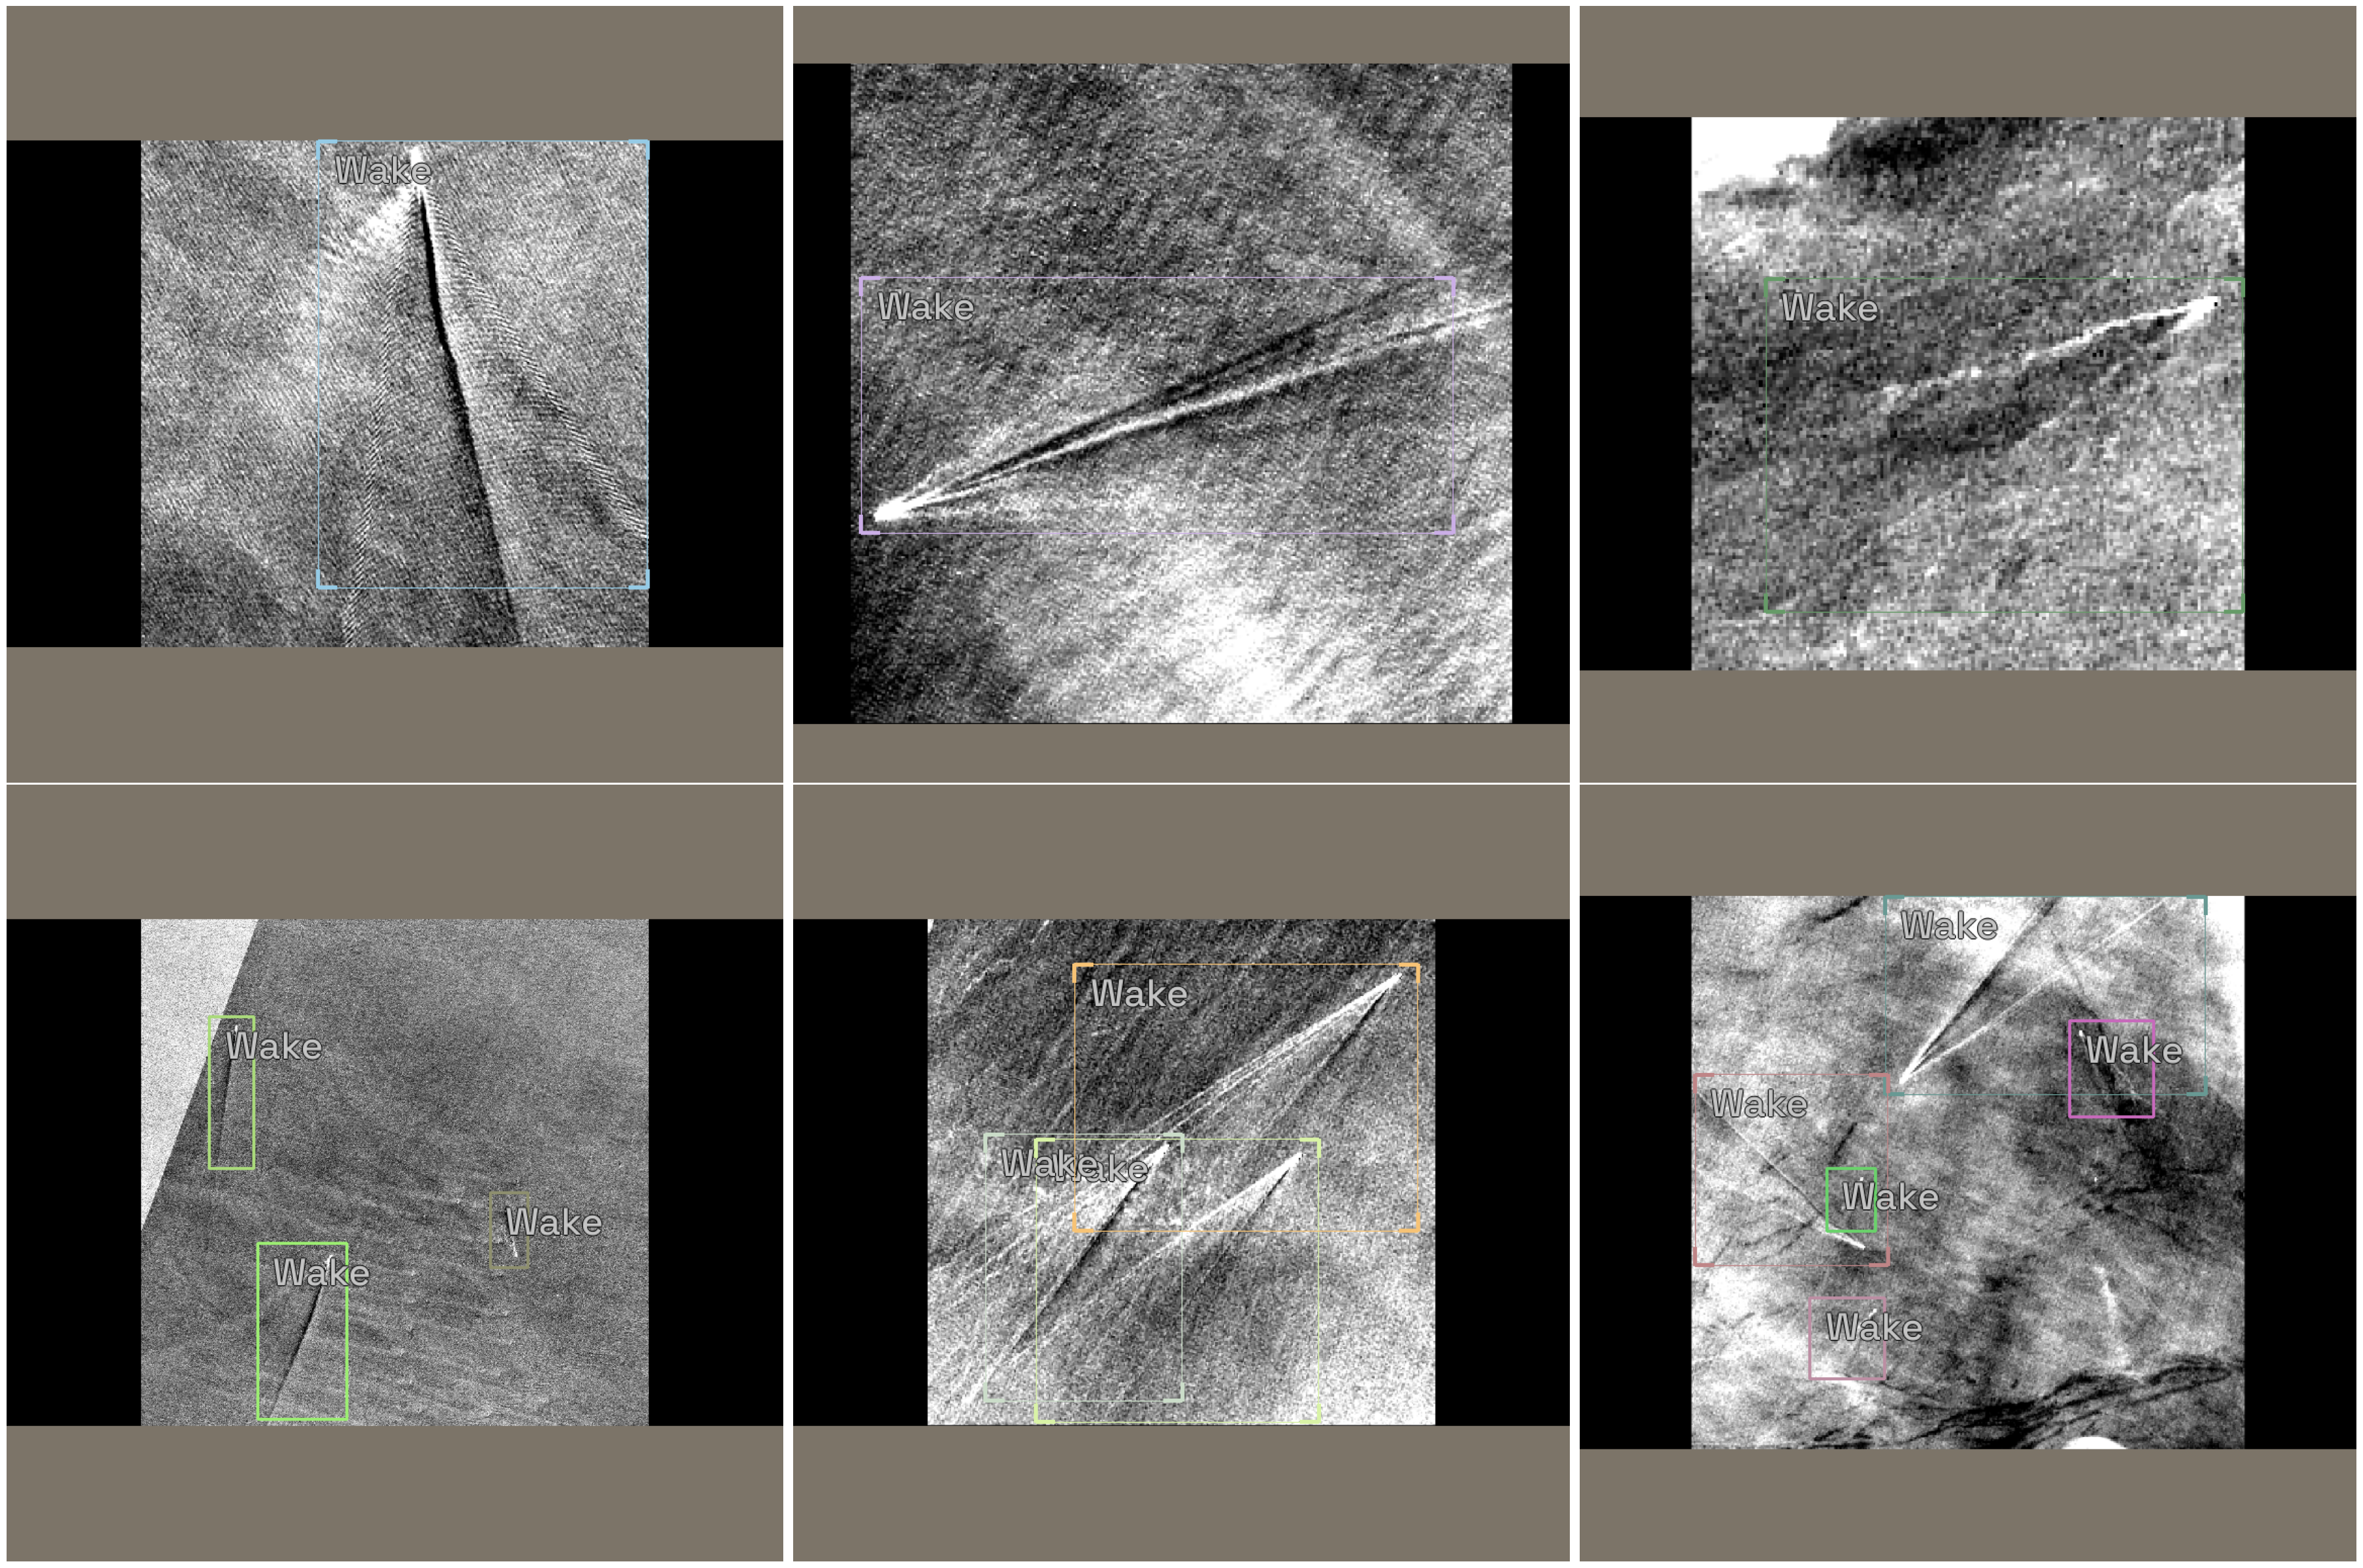

In [35]:
# show batch
model_type.show_batch(first(valid_dl), ncols=3)

In [36]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

Training using fastai

In [37]:
learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

In [38]:
learn.lr_find()

# For Sparse-RCNN, use lower `end_lr`
# learn.lr_find(end_lr=0.005)

RuntimeError: DataLoader worker (pid 30674) is killed by signal: Bus error. It is possible that dataloader's workers are out of shared memory. Please try to raise your shared memory limit.

In [ ]:
learn.fine_tune(200, 1e-4, freeze_epochs=1)

In [ ]:
infer_dl = model_type.infer_dl(valid_ds, batch_size=8, shuffle=False)
preds = model_type.predict_from_dl(model, infer_dl, keep_images=True)

In [ ]:
model_type.show_results(model, valid_ds, detection_threshold=.5, num_samples=8)

In [ ]:
n = 5
show_preds(preds=preds[:n], figsize=(18,10*n))

In [ ]:
from icevision.models.inference_sahi import IceSahiModel

sahimodel = IceSahiModel(model_type=model_type, model=model, class_map=trainParser.class_map, tfms=valid_tfms, confidence_threshold=0.1)

pred = sahimodel.get_sliced_prediction(
                "/content/drive/MyDrive/DATASET/data/Immagini_test/112.png",
                keep_sahi_format=False,
                return_img=True,
                slice_height = 700,
                slice_width = 700,
                overlap_height_ratio = 0.2,
                overlap_width_ratio = 0.2,
            )


In [ ]:
pred["img"]

In [ ]:
img = PIL.Image.open("/content/drive/MyDrive/DATASET/data/Immagini_test/112.png")
pred_dict  = model_type.end2end_detect(img, valid_tfms, model, class_map=class_map, detection_threshold=0.5)